<div class="clearfix" style="padding: 10px; padding-left: 0px">

<p>
<a href="http://bombora.com"><img src="https://app.box.com/shared/static/e0j9v1xjmubit0inthhgv3llwnoansjp.png" width="200px" class="pull-right" style="display: inline-block; margin: 5px; vertical-align: middle;"></a>
<h1> Bombora Data Science: <br> *Interview Exam* </h1>
</div>
<img width="200px" src=https://app.box.com/shared/static/15slg1mvjd1zldbg3xkj9picjkmhzpa5.png >

---

# Welcome

Welcome! This notebook contains interview exam questions referenced in the *Instructions* section in the `README.md`—please read that first, *before* attempting to answer questions here.

<div class="alert alert-info" role="alert" style="margin: 10px">
<p>**ADVICE**</p>
<p>*Do not* read these questions, and panic, *before* reading the instructions in `README.md`.</p>
</div>

<div class="alert alert-warning" role="alert" style="margin: 10px">
<p>**WARNING**</p>

<p>If using [try.jupyter.org](https://try.jupyter.org) do not rely on the server for anything you want to last - your server will be *deleted after 10 minutes of inactivity*. Save often and rember download notebook when you step away (you can always re-upload and start again)!</p>
</div>


## Have fun!

Regardless of outcome, getting to know you is important. Give it your best shot and we'll look forward to following up!

# Exam Questions

## 1. Algo + Data Structures

### Q 1.1: Fibionacci
![fib image](https://upload.wikimedia.org/wikipedia/commons/thumb/9/93/Fibonacci_spiral_34.svg/200px-Fibonacci_spiral_34.svg.png)

#### Q 1.1.1
Given $n$ where $n \in \mathbb{N}$ (i.e., $n$ is an integer and $n > 0$), write a function `fibonacci(n)` that computes the Fibonacci number $F_n$, where $F_n$ is defined by the recurrence relation:

$$ F_n = F_{n-1} + F_{n-2}$$

with initial conditions of:

$$ F_1 = 1,  F_2 = 1$$

##### Solution 1.1.1

In [1]:
# To test the solution on a few known values
def test_fib(fib_list):
    return fib_list == [ 1, 1, 2, 3, 5, 8, 13, 21, 34]

#An imperative solution
def fibonacci(n):
    ''' A function that calculates the nth 
        Fibonacci number using an imperative approach
    '''
    prev_1 = 1
    prev_2 = 1
    
    out = prev_1
    
    if n > 2:
        for i in range(2, n) :
            out = prev_1 + prev_2
            prev_1 = prev_2
            prev_2 = out
    return out

### test

In [2]:
#Sanity check
test_fib([fibonacci(i) for i in range(1, 10)])

True

#### Q 1.1.2
What's the complexity of your implementation?

##### Solution 1.1.2

The time complexity is $O(n)$and the space complexity is $O(1)$. 

We can see this by evaluating the loop in our algorithm. The work inside the loop happens $N - 2$ times, so as we increase $N$ the time taken by our algorithm grows linearly. As for the space complexity, we never actually save any values so as we increase N the amount of space we use is unnafected, so asymptotically its just constant.

#### Q 1.1.3
Consider an alternative implementation to compute Fibonacci number $F_n$ and write a new function, `fibonacci2(n)`.

##### Solution Q 1.1.3

In [3]:
def fibbonacci2(n):
    '''A function that calculates the nth fibonacci 
    number using recursion and caching
    '''
    
    cache = [1, 1] + [0] * (n - 2)
    out = 0
    
    if n == 1 or n == 2:
        return 1
    
    if cache[n - 2]  == 0:
        cache[n - 2] = fibbonacci2(n - 2)
    
    if cache[n - 1] == 0:
        cache[n - 1] = fibbonacci2(n - 1)
    
    
    return cache[n - 2] + cache[n - 1]
    

In [4]:
#sanity check
test_fib([fibbonacci2(i) for i in range(1, 10)])

True

#### Q 1.1.4
What's the complexity of your implementation?

##### Solution 1.1.4

This is a slight improvement on the naive recursive approach. In this case we also save previously computed values so we can look them up when needed. This is a dynamic programming approach because our subproblems are exactly the same as our main problem but at a smaller scale. 

The time complexity is $O(N)$. To populate our cache, $N-2$ calculations take place, if N grows by some amount $\epsilon$ our running time increases linearly with that amount. 

The space complexity also depends on $N$ in this example, since if we increase N, we'll need more room in our cache. The extra room is clearly linearly dependent on the number of elements (it will be exactly the (number of elements - 2)). Thus our space complexity is $O(n)$ as well.



#### Q 1.1.5
What are some examples of optimizations that could improve computational performance?


##### Solution 1.1.5

The fastest solution to fibonnaci is actually one that exploits matrix exponentiation. 

The following is a known equivalence :
$ (\left( \begin{array}{ccc}
1 & 1  \\
0 & 0 \\
 \end{array} \right))^n$  = $ (\left( \begin{array}{ccc}
F_{n+1} & F_n  \\
F_n & F_{n-1} \\
 \end{array} \right))$

So we can calculate fibonacci numbers by repeated matrix exponentation. This takes $O(log(n))$ time.

Reference: http://www.geeksforgeeks.org/matrix-exponentiation/

### Q 1.2: Linked List
![ll img](https://upload.wikimedia.org/wikipedia/commons/thumb/6/6d/Singly-linked-list.svg/500px-Singly-linked-list.svg.png)

#### Q 1.2.1
Consider a [singly linked list](https://en.wikipedia.org/wiki/Linked_list), $L$. Write a function `is_palindrome(L)` that detects if $L$ is a [palindrome](https://en.wikipedia.org/wiki/Palindrome), by returning a bool, `True` or `False`.


#### Q 1.2.2
What is the complexity of your implementation?

#### Q 1.2.3
Consider an alternative implementation to detect if L is a palindrome and write a new function, `is_palindrome2(L)`.

#### Q 1.2.4
What's the complexity of this implementation?


#### Q 1.2.5 
What are some examples of optimizations that could improve computational performance?


## 2. Prob + Stats

### Q 2.1: Finding $\pi$ in a random uniform?
![pi pie img](http://core2.staticworld.net/images/article/2016/03/pi-day-intro-100649273-carousel.idge.jpeg)

Given a uniform random generator $[0,1)$ (e.g., use your language's standard libary to generate random value), write a a function `compute_pi` to compute [$\pi$](https://en.wikipedia.org/wiki/Pi).

##### Solution 2.1

We can use rejection sampling to approximate $\pi$ using uniform numbers. We can generate $N_{total}$ random points inside a square and if the point falls within the circle inscribed in that square we can take it as a hit and accept the point if it falls outside the circle it will be a miss and rejected from our eventual calculation. If we keep track of the number of hits ($N_{hits}$)Then $\pi$ will be close to $4[\frac{N_{hits}}{N_{total}}]$

We are just going to look at the case when the radius of our circle is 1 and only at one quadrant of the circle. 

Reference:
https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers

In [5]:
from __future__ import division
import random
import matplotlib.pyplot as plt
% matplotlib inline

In [6]:
def within_circle(p_x, p_y):
    '''Check whether it falls in the circle'''
    if ((p_x ** 2) + (p_y ** 2)) < 1:
        return True
    else:
        return False


#option to return sample values
def approx_pi(n, include_samples):
    '''Approximate pi using 
    random sampling with rejection
    '''
    
    hit_count = 0
    rand_xs = []
    rand_ys = []
    
    for i in range(n):
        rand_pt_1 = random.random()
        rand_pt_2 = random.random()
        
        if within_circle(rand_pt_1, rand_pt_2):
            hit_count += 1
            
            rand_xs.append(rand_pt_1)
            rand_ys.append(rand_pt_2)
            
    out = (hit_count / n) * 4
    
    if include_samples:
        return out, (rand_xs, rand_ys)
    else:
        return out
    

## Plots

(3.1, 3.2)

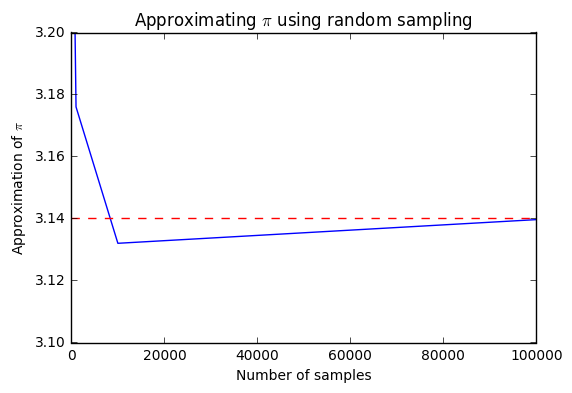

In [11]:
# A plot showing how our estimate of pi gets better with the number of points sampled
precisions = [10 ** i for i in range(6)]
values = [approx_pi(precisions[i], False) for i in range(6)]


ax = plt.subplot()
ax.plot(precisions, values)
plt.title('Approximating $\pi$ using random sampling')
plt.axhline(y=3.14, color = 'r', linestyle='--')
plt.xlabel('Number of samples')
plt.ylabel('Approximation of $\pi$')
ax.set_ylim([3.1, 3.2])

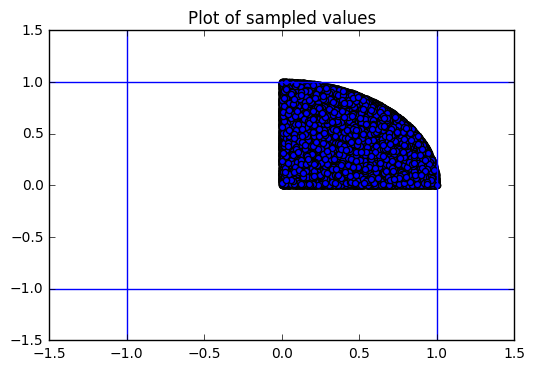

In [8]:
#A plot showing how our samples fill in the quadrant 
plt.title("Plot of sampled values")
approx, samples = approx_pi(precisions[i], True)
plt.axhline(y=1, xmin=0, xmax=2)
plt.axhline(y=-1, xmin=0, xmax=2)
plt.axvline(x = -1, ymin = 0, ymax = 1)
plt.axvline(x = 1, ymin = 0, ymax = 1)

plt.scatter(samples[0], samples[1])

### Q 2.2: Making a 6-side die roll a 7?

![reno die image](http://thumbs.ebaystatic.com/images/g/IQ8AAOSwvzRXyagD/s-l225.jpg)

Using a single 6-side die, how can you generate a random number between 1 - 7?

### Q 2.3: Is normality uniform?

![normal and uniform distributions](https://qph.ec.quoracdn.net/main-qimg-f6ed71ed1d0059760fb63db384dcbcca-c)

Given draws from a normal distribution with known parameters, how can you simulate draws from a uniform distribution?

### Q 2.4: Should you pay or should you go?

![coin flip](https://lh5.ggpht.com/iwD6MnHeHVAXNBgrO7r4N9MQxxYi6wT9vb0Mqu905zTnNlBciONAA98BqafyjzC06Q=w300)

Let’s say we play a game where I keep flipping a coin until I get heads. If the first time I get heads is on the nth coin, then I pay you $2^{(n-1)}$ US dollars. How much would you pay me to play this game? Explain.

### Q 2.5: Uber vs. Lyft

![uber vs lyft](http://usiaffinity.typepad.com/.a/6a01347fc1cb08970c01bb0876bcbe970d-pi)

You request 2 UberX’s and 3 Lyfts. If the time that each takes to reach you is IID, what is the probability that all the Lyfts arrive first? What is the probability that all the UberX’s arrive first?